In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter note.
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data_set = datasets.MNIST(root='Home Work./data', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='Home Work./data', train=False, download=True, transform=transform)
len(train_data_set)

60000

In [4]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: Home Work./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
# Randomly shuffle the labels for training and testing datasets
rand_labels_train = torch.tensor(np.random.randint(0, 10, len(train_data_set)))
train_data_set.targets = rand_labels_train

rand_labels_test = torch.tensor(np.random.randint(0, 10, len(test_data_set)))
test_data_set.targets = rand_labels_test


In [6]:
# Create data loaders for training and testing
train_loader = DataLoader(train_data_set, batch_size=50, shuffle=True)
test_loader = DataLoader(test_data_set, batch_size=50, shuffle=True)


In [7]:
import torch.nn as nn
import torch.nn.functional as F

class DNModel(nn.Module):
    def __init__(self, input_size=784, hidden1_size=120, hidden2_size=120, hidden3_size=16, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, hidden3_size)
        self.output_layer = nn.Linear(hidden3_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.output_layer(x)
        return x


In [8]:
dn_model=DNModel()
print(dn_model)

DNModel(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=16, bias=True)
  (output_layer): Linear(in_features=16, out_features=10, bias=True)
)


In [9]:
CriterionLoss = nn.CrossEntropyLoss()

In [10]:
optim = torch.optim.Adam(dn_model.parameters(), lr=0.001)

In [11]:
epochs = 30
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    for batch, (X_train, y_train) in enumerate(train_loader):
        y_pred = dn_model(X_train.view(X_train.size(0), -1))  # Flatten X_train
        loss = CriterionLoss(y_pred, y_train)

        # Update model parameters
        optim.zero_grad()
        loss.backward()
        optim.step()

    train_losses.append(loss.item())
    
   
    with torch.no_grad():
        for batch, (X_test, y_test) in enumerate(test_loader):
            y_val = dn_model(X_test.view(X_test.size(0), -1))

  
    test_loss = CriterionLoss(y_val, y_test)
    test_losses.append(test_loss.item())
    print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')



Epoch 1/30, Train Loss: 2.3018, Test Loss: 2.3009
Epoch 2/30, Train Loss: 2.3014, Test Loss: 2.3005
Epoch 3/30, Train Loss: 2.3043, Test Loss: 2.3004
Epoch 4/30, Train Loss: 2.3021, Test Loss: 2.3058
Epoch 5/30, Train Loss: 2.3065, Test Loss: 2.3023
Epoch 6/30, Train Loss: 2.2965, Test Loss: 2.3072
Epoch 7/30, Train Loss: 2.2976, Test Loss: 2.3034
Epoch 8/30, Train Loss: 2.2864, Test Loss: 2.3004
Epoch 9/30, Train Loss: 2.2933, Test Loss: 2.3203
Epoch 10/30, Train Loss: 2.2703, Test Loss: 2.3015
Epoch 11/30, Train Loss: 2.3192, Test Loss: 2.2968
Epoch 12/30, Train Loss: 2.2548, Test Loss: 2.3239
Epoch 13/30, Train Loss: 2.2880, Test Loss: 2.3318
Epoch 14/30, Train Loss: 2.2945, Test Loss: 2.3208
Epoch 15/30, Train Loss: 2.2493, Test Loss: 2.3650
Epoch 16/30, Train Loss: 2.2314, Test Loss: 2.3684
Epoch 17/30, Train Loss: 2.3061, Test Loss: 2.3208
Epoch 18/30, Train Loss: 2.2703, Test Loss: 2.3879
Epoch 19/30, Train Loss: 2.2357, Test Loss: 2.3593
Epoch 20/30, Train Loss: 2.2498, Test Lo

In [12]:
train_losses=torch.tensor(train_losses)
test_losses=torch.tensor(test_losses)

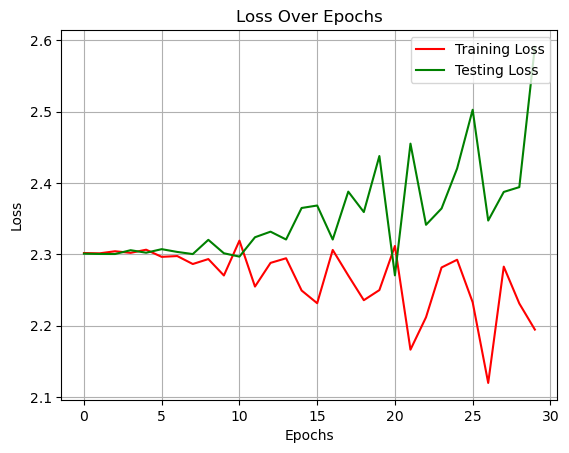

In [13]:
import matplotlib.pyplot as plt

# Visualize losses for the MNIST dataset
plt.plot(range(epochs), train_losses, 'red', label='Training Loss')
plt.plot(range(epochs), test_losses, 'green', label='Testing Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()
